# DISCRETIZACION DE VARIABLES NUMERICAS

In [426]:
#importando librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libraries import *

In [427]:
#Cargando datos
data = pd.read_csv("./dataset.csv",delimiter=";")

In [428]:
data.nunique() #CANTIDAD DE VALORES DIFERENTES EN EL DATASET 

SOCIO                     8618
CUENTA                    8618
AGENCIA                      7
TIPO_SOCIO                   4
MONEDA                       1
PAGARE                    9734
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
DIAS                         4
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [429]:
data['MORA'] = np.where(data['NDIAS_ATRASADOS'] > data['DIAS'],1,0)     #---Agregando la columna mora

In [430]:
#Funcion para obtener el maximo y minimo valor por categoria
def min_max_per_category(data, category_column, value_column, labels): 
    result = []
    for label in labels:
        min_value = data.query(f"{category_column} == {label}")[value_column].min().round()
        max_value = data.query(f"{category_column} == {label}")[value_column].max().round()
        result.append(f'{min_value}-{max_value}')
    return result

In [431]:
#Diccionario de discretizacion percentiles
dicc = {
    "TEA": 6,                  #--- TEA INTERES
    "CUO": 13,                  #--- CUOTA FIJA
    "CUO_F": 7,                 #--- CUOTAS FALTANTES VIGENTES
    "MONTO": 15,                #--- MONTO PRESTAMO
    "SALDO": 9                  #--- SALDO PRESTAMO
}

# Acceder a cada variable en el diccionario
pTEA= dicc["TEA"]
pCUO_FIJA = dicc["CUO"]
pCUO = dicc["CUO_F"]
pMONTO = dicc["MONTO"]
pSALDO = dicc["SALDO"]

In [432]:
#FUNCIO DE DISCRETIZACION DE VARIABLES
def percentil(column, value):   #--- INPUT : COLUMNA, Cantidad de divisiones
    labels = [i for i in range(0, value)]
    nColumn = column + 'F'
    data[nColumn] = pd.qcut(data[column], value, labels=labels)
    return data[nColumn], labels

### TEA_INTERES

In [433]:
data.TEA_INTERES.nunique()      #--- Cantidad de valores unicos

958

In [434]:
data['TEA_ANUAL'], labels = percentil('TEA_INTERES', pTEA)    #--- Division del dataset en deciles

In [435]:
data[['TEA_INTERES', 'TEA_ANUAL']].tail()    #---Comparando datos clasificados

,TEA_INTERES,TEA_ANUAL
9729,42.58,0
9730,42.58,0
9731,39.29,0
9732,79.56,2
9733,340.87,5


In [436]:
min_max_list = min_max_per_category(data, 'TEA_ANUAL', 'TEA_INTERES', labels) #--- Llamar a la funcion para obtener el minimo y el maximo por categoria

label_to_min_max = dict(zip(labels, min_max_list))              #--- Crear un diccionario de mapeo de etiquetas a valores concatenados

data['TEA_ANUAL'] = data['TEA_ANUAL'].map(label_to_min_max)     #--- Asignar los valores concatenados a la columna TEA_ANUAL

In [437]:
data[['TEA_INTERES', 'TEA_ANUAL']].sample(5)        #--- Comprobando la clasificacion de los datos

,TEA_INTERES,TEA_ANUAL
9315,151.82,100.0-152.0
9310,213.84,152.0-214.0
2940,20.98,0.0-46.0
5780,200.09,152.0-214.0
765,49.36,46.0-67.0


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\403655400.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


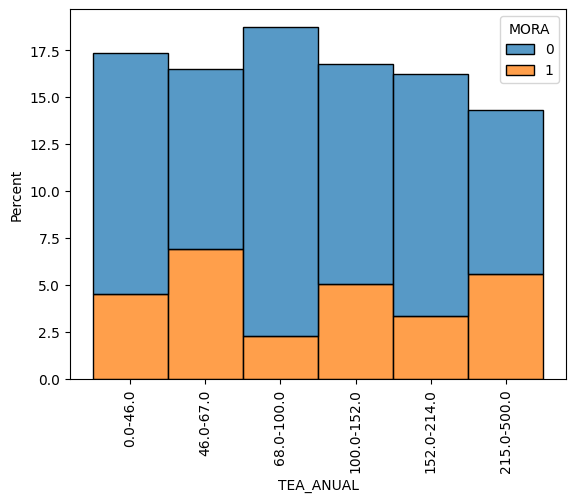

In [438]:
ax = sns.histplot(data, x='TEA_ANUAL', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### CUOTA_FIJA

In [439]:
data['CUO_FIJA'], labels = percentil('CUOTA_FIJA', pCUO_FIJA) 

In [440]:
min_max_list = min_max_per_category(data, 'CUO_FIJA', 'CUOTA_FIJA', labels)

label_to_min_max = dict(zip(labels, min_max_list))

data['CUO_FIJA'] = data['CUO_FIJA'].map(label_to_min_max)

In [441]:
data['CUO_FIJA'] = data['CUO_FIJA'].fillna('0.0-21.0')          #--- Datos Nulos

In [442]:
data[['CUOTA_FIJA', 'CUO_FIJA']].sample(5)

,CUOTA_FIJA,CUO_FIJA
4399,98.57,72.0-102.0
7657,52.99,49.0-72.0
5979,89.37,72.0-102.0
375,144.76,138.0-187.0
6164,21.27,21.0-29.0


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\1640587684.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


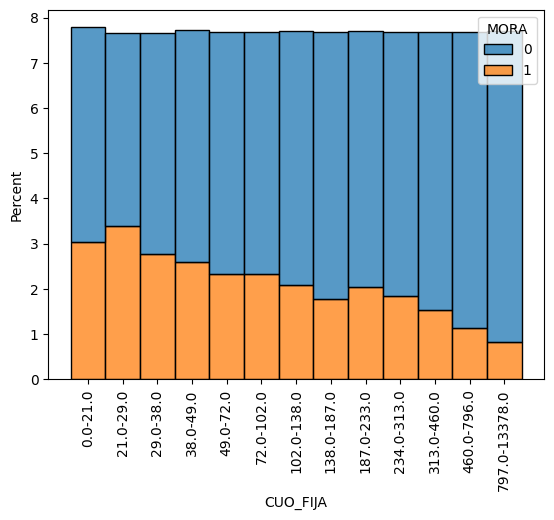

In [443]:
ax = sns.histplot(data, x='CUO_FIJA', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### EDAD

In [444]:
data.EDAD.describe()        #--- Analisis descriptivo de la columna Edad dentro del dataset

count    9734.000000
mean       40.610849
std        11.918444
min        18.000000
25%        31.000000
50%        39.000000
75%        49.000000
max       121.000000
Name: EDAD, dtype: float64

In [445]:
labels = ['18-25','25-35','35-45','45-55','55-65','65+']            #--- Etiquetas de clasificación según el rango de edades                    
bins = [18, 25, 35, 45, 55, 65, np.inf]                             #--- Contenedores de rangos de edades
data['RANGO_EDAD'] = pd.cut(data['EDAD'], bins=bins, labels=labels, include_lowest=True) #--- Division del dataset en deciles

In [446]:
data[['EDAD', 'RANGO_EDAD']].sample(5)

,EDAD,RANGO_EDAD
4661,34,25-35
4919,27,25-35
682,31,25-35
6054,46,45-55
1055,46,45-55


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3032731934.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


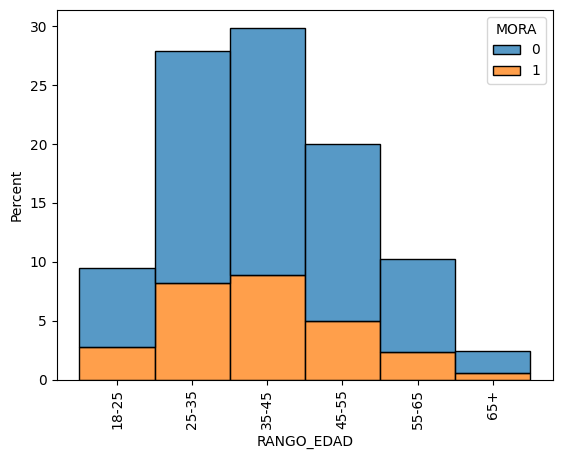

In [447]:
ax = sns.histplot(data, x='RANGO_EDAD', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### NCUO_ATRASADAS

In [448]:
data.NCUO_ATRASADAS.describe()      #--- Descripcion de la columna NCUO_ATRASADAS

count    9734.000000
mean        4.254263
std        11.417179
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       169.000000
Name: NCUO_ATRASADAS, dtype: float64

In [449]:
data.NCUO_ATRASADAS.value_counts()

NCUO_ATRASADAS
0      4670
1      1399
2       863
3       664
4       249
       ... 
110       1
146       1
140       1
136       1
64        1
Name: count, Length: 111, dtype: int64

<Axes: xlabel='NCUO_ATRASADAS', ylabel='Percent'>

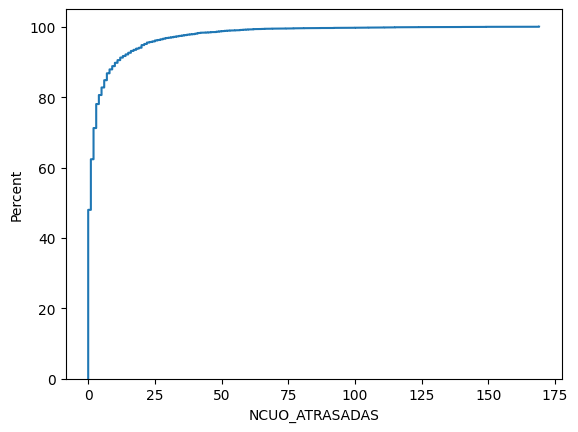

In [450]:
#Grafico que muestra la variacion de las variables
sns.ecdfplot(data, x='NCUO_ATRASADAS', stat='percent')      

In [451]:
labels = ['1','2','3','4-6','6-12','12+']
bins = [0, 1, 2, 3, 6,12,np.inf]
data['CUO_ATRASADAS'] = pd.cut(data['NCUO_ATRASADAS'], bins=bins, labels=labels)

In [452]:
# data[['NCUO_ATRASADAS', 'CUO_ATRASADAS']].sample(5)
data['CUO_ATRASADAS'] = data['CUO_ATRASADAS'].cat.add_categories(['0'])     #--- Agregar la categoria 0 faltante en la discretizacion
data['CUO_ATRASADAS'] = data['CUO_ATRASADAS'].fillna('0')                   #--- Rellenar datos faltantes con la nueva categoría

In [453]:
data[['NCUO_ATRASADAS', 'CUO_ATRASADAS']].sample(5)         #--- Verificacion de la clasificación

,NCUO_ATRASADAS,CUO_ATRASADAS
4252,1,1
7861,1,1
9514,2,2
9137,0,0
6352,0,0


In [454]:
data.CUO_ATRASADAS.value_counts()

CUO_ATRASADAS
0       4670
1       1399
2        863
12+      854
3        664
4-6      659
6-12     625
Name: count, dtype: int64

In [455]:
def data_no_zero(data, column):
    data_p = data[data[column] != '0']
    return data_p

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\4274280972.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


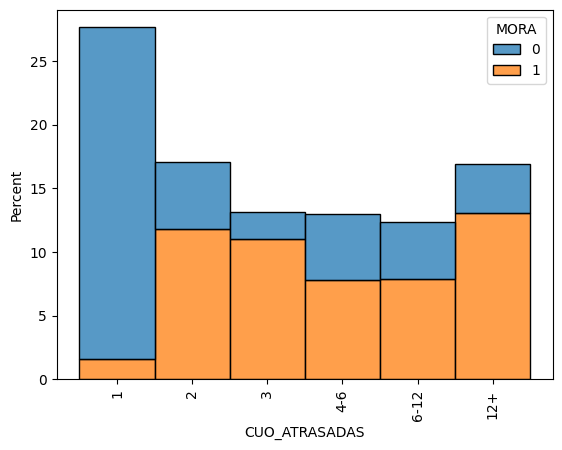

In [456]:
ax = sns.histplot( data_no_zero(data, 'CUO_ATRASADAS'), x='CUO_ATRASADAS', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### CUOTAS FALTANTES VIGENTES

In [457]:
data.CUO_FALTANTES_VIGENTES.describe()          #--- Descripcion de la columna CUO_FALTANTES_VIGENTES

count    9734.000000
mean       26.021677
std        31.744686
min         0.000000
25%         5.000000
50%        14.000000
75%        41.000000
max       495.000000
Name: CUO_FALTANTES_VIGENTES, dtype: float64

<Axes: xlabel='CUO_FALTANTES_VIGENTES', ylabel='Percent'>

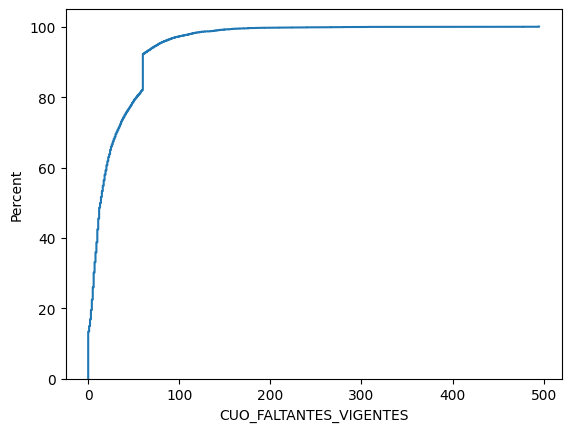

In [458]:
#Grafico que muestra la variacion de las variables
sns.ecdfplot(data, x='CUO_FALTANTES_VIGENTES', stat='percent')

In [459]:
data['CUO_FALTANTES'], labels = percentil('CUO_FALTANTES_VIGENTES', pCUO) 

In [460]:
min_max_list = min_max_per_category(data, 'CUO_FALTANTES', 'CUO_FALTANTES_VIGENTES', labels)
label_to_min_max = dict(zip(labels, min_max_list))
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].map(label_to_min_max)

In [461]:
mask = data['CUO_FALTANTES_VIGENTES'] != 0                          #--- Separar la clasificacion de 0-1 a 0 (Cancelado)
data['CUO_FALTANTES'] = data.loc[mask, 'CUO_FALTANTES'].ffill()     

In [462]:
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].cat.add_categories(['0']) #--- Agregar la nueva categoría a la clasificación
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].fillna('0')               #--- Rellenar los datos vacios con la nueva categoría

In [463]:
data.loc[data['CUO_FALTANTES'].isin(['2-6', '0-1']), 'CUO_FALTANTES'] = np.nan     #--- Poner valores nulos en las columnas a unir

In [464]:
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].cat.add_categories(['1-6'])   #--- Agregar nueva categoria
data['CUO_FALTANTES'] = data['CUO_FALTANTES'].fillna('1-6')                 #--- Rellenar los valores nulos, por la nueva categoría
data['CUO_FALTANTES'].replace(['0-1', '2-6'], np.nan, inplace = True);      #--- Eliminar las anteriores columnas

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3283618685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CUO_FALTANTES'].replace(['0-1', '2-6'], np.nan, inplace = True);      #--- Eliminar las anteriores columnas
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3283618685.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rena

In [465]:
data[['CUO_FALTANTES_VIGENTES', 'CUO_FALTANTES']].sample(5)     #--- Verificar los datos discretizados

,CUO_FALTANTES_VIGENTES,CUO_FALTANTES
8457,45,35-60
6606,5,1-6
7199,29,19-34
9137,0,0
8523,48,35-60


In [466]:
data.CUO_FALTANTES.value_counts()

CUO_FALTANTES
35-60     2001
1-6       1631
7-11      1494
19-34     1338
0         1305
12-18     1212
61-495     753
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\251425463.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


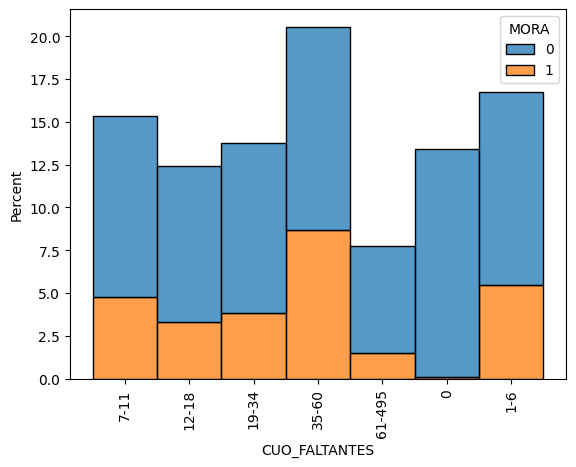

In [468]:
ax = sns.histplot(data=data, x='CUO_FALTANTES', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### NDIAS ATRASADOS

In [320]:
data.NDIAS_ATRASADOS.describe()

count    9734.000000
mean       82.099445
std       271.360152
min         0.000000
25%         0.000000
50%         0.000000
75%        29.000000
max      3458.000000
Name: NDIAS_ATRASADOS, dtype: float64

<Axes: xlabel='NDIAS_ATRASADOS', ylabel='Proportion'>

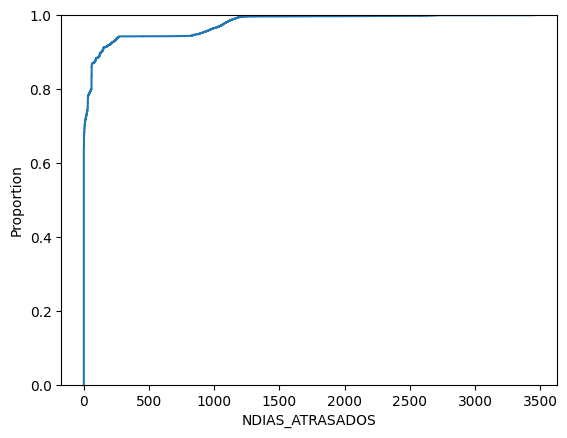

In [321]:
sns.ecdfplot(data=data,x='NDIAS_ATRASADOS')

In [322]:
labels = ['1-15','15-45','45-60','60-90','90+']
bins = [0, 15, 45, 60, 90, np.inf]
data['DIAS_ATRASADOS'] = pd.cut(data['NDIAS_ATRASADOS'], bins=bins, labels=labels)


In [323]:
data['DIAS_ATRASADOS'] = data['DIAS_ATRASADOS'].cat.add_categories(['0'])
data['DIAS_ATRASADOS'] = data['DIAS_ATRASADOS'].fillna('0')

In [324]:
data[['NDIAS_ATRASADOS', 'DIAS_ATRASADOS']].sample(5)

,NDIAS_ATRASADOS,DIAS_ATRASADOS
6575,0,0
5717,4,1-15
4525,0,0
2292,60,45-60
8090,16,15-45


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3654616511.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


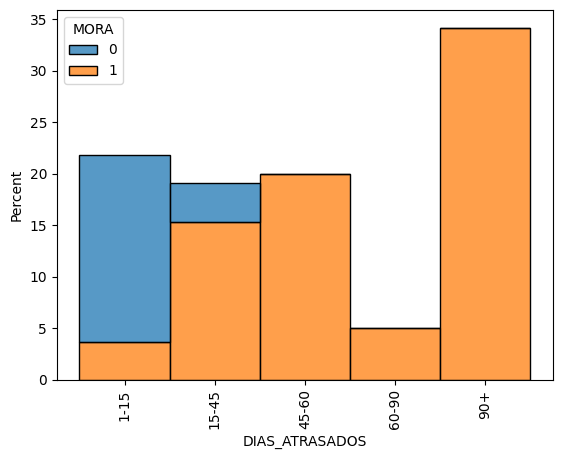

In [325]:
ax = sns.histplot(data = data_no_zero(data,'DIAS_ATRASADOS'), x='DIAS_ATRASADOS', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### MONTO_PRESTAMO

In [326]:
data.MONTO_PRESTAMO.describe()

count      9734.000000
mean       5997.804119
std       11111.069155
min         200.000000
25%        1300.000000
50%        2735.000000
75%        5500.000000
max      450000.000000
Name: MONTO_PRESTAMO, dtype: float64

In [327]:
data['M_PRESTAMO'], labels = percentil('MONTO_PRESTAMO', pMONTO) 

In [328]:
min_max_list = min_max_per_category(data, 'M_PRESTAMO', 'MONTO_PRESTAMO', labels)
label_to_min_max = dict(zip(labels, min_max_list))
data['M_PRESTAMO'] = data['M_PRESTAMO'].map(label_to_min_max)

In [329]:
data[['MONTO_PRESTAMO', 'M_PRESTAMO']].sample(10)

,MONTO_PRESTAMO,M_PRESTAMO
3896,5000.0,4510.0-5500.0
6033,1260.0,1135.0-1510.0
2088,2220.0,2210.0-2290.0
2660,7000.0,5510.0-7000.0
3377,43500.0,20001.0-450000.0
3797,5000.0,4510.0-5500.0
3431,3000.0,2300.0-3030.0
4616,3140.0,3035.0-3360.0
3854,3500.0,3370.0-4500.0
9018,1015.0,200.0-1015.0


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\4126947979.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


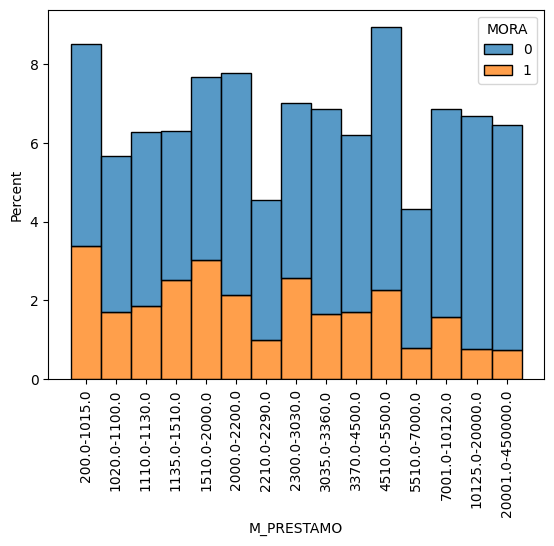

In [330]:
ax = sns.histplot(data, x='M_PRESTAMO', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### SALDO_PRESTAMO

In [331]:
data.SALDO_PRESTAMO.describe()

count      9734.000000
mean       3476.077214
std        6708.486439
min           0.000000
25%         610.610000
50%        1450.330000
75%        3381.252500
max      177657.170000
Name: SALDO_PRESTAMO, dtype: float64

In [332]:
data['S_PRESTAMO'], labels = percentil('SALDO_PRESTAMO', pSALDO) 

In [333]:
min_max_list = min_max_per_category(data, 'S_PRESTAMO', 'SALDO_PRESTAMO', labels)
label_to_min_max = dict(zip(labels, min_max_list))
data['S_PRESTAMO'] = data['S_PRESTAMO'].map(label_to_min_max)

In [334]:
data[['SALDO_PRESTAMO', 'S_PRESTAMO']].sample(10)

,SALDO_PRESTAMO,S_PRESTAMO
9350,839.98,535.0-845.0
2856,17324.69,7832.0-177657.0
5074,0.00,0.0-31.0
2545,889.60,845.0-1160.0
3748,6795.34,3855.0-7832.0
4333,4193.73,3855.0-7832.0
9679,51798.96,7832.0-177657.0
3475,4008.68,3855.0-7832.0
202,564.31,535.0-845.0
3089,994.36,845.0-1160.0


In [335]:
data.S_PRESTAMO.value_counts()

S_PRESTAMO
845.0-1160.0       1086
0.0-31.0           1082
535.0-845.0        1082
2460.0-3853.0      1082
7832.0-177657.0    1082
34.0-534.0         1081
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
Name: count, dtype: int64

In [336]:
mask = data['SALDO_PRESTAMO'] != 0
data['S_PRESTAMO'] = data.loc[mask, 'S_PRESTAMO'].ffill()
data['S_PRESTAMO'] = data['S_PRESTAMO'].cat.add_categories(['0'])
data['S_PRESTAMO'] = data['S_PRESTAMO'].fillna('0')

In [337]:
data.loc[data['S_PRESTAMO'].isin(['0.0-31.0', '34.0-534.0']), 'S_PRESTAMO'] = np.nan

In [338]:
data['S_PRESTAMO'] = data['S_PRESTAMO'].cat.add_categories(['1.0-534.0'])
data['S_PRESTAMO'] = data['S_PRESTAMO'].fillna('1.0-534.0')
data['S_PRESTAMO']=data['S_PRESTAMO'].replace(['0.0-31.0', '34.0-534.0'], np.nan)

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3447588833.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['S_PRESTAMO']=data['S_PRESTAMO'].replace(['0.0-31.0', '34.0-534.0'], np.nan)


In [339]:
data[['SALDO_PRESTAMO','S_PRESTAMO']].sample(15)

,SALDO_PRESTAMO,S_PRESTAMO
1207,4532.95,3855.0-7832.0
5733,3474.42,2460.0-3853.0
1949,153.34,1.0-534.0
4860,1654.55,1161.0-1721.0
2975,6356.20,3855.0-7832.0
4961,1316.89,1161.0-1721.0
2896,2916.54,2460.0-3853.0
2022,2230.00,1723.0-2460.0
3223,844.12,535.0-845.0
787,434.50,1.0-534.0


In [340]:
data.S_PRESTAMO.value_counts()

S_PRESTAMO
1.0-534.0          1112
845.0-1160.0       1086
535.0-845.0        1082
2460.0-3853.0      1082
7832.0-177657.0    1082
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
0                  1051
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\2919912823.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


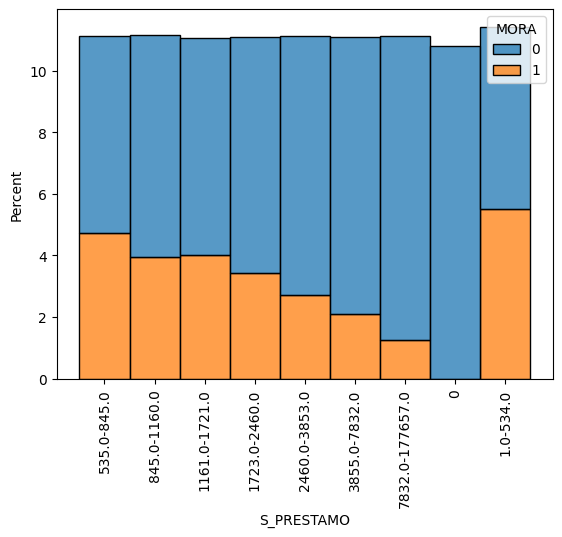

In [341]:
ax = sns.histplot(data , x='S_PRESTAMO', hue='MORA',stat='percent', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### NRO_REPROGRAMACIONES

In [342]:
data.NRO_REPRO.describe()

count    3823.000000
mean        2.191734
std         1.489582
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: NRO_REPRO, dtype: float64

In [343]:
data['IS_REPRO'] = data['NRO_REPRO'].apply(lambda x: 1 if x >= 1 else 0)

### RESUMEN

In [344]:
data.head()

,SOCIO,CUENTA,AGENCIA,TIPO_SOCIO,MONEDA,PAGARE,PRODUCTO,FEC_ULT_PAGO,TEA_INTERES,CUOTA_FIJA,...,RANGO_EDAD,CUO_ATRASADAS,CUO_FALTANTES_VIGENTESF,CUO_FALTANTES,DIAS_ATRASADOS,MONTO_PRESTAMOF,M_PRESTAMO,SALDO_PRESTAMOF,S_PRESTAMO,IS_REPRO
0,"TORRES PUMA, JOSEPH",16927,1,1,S,01- 16945,MAS VELOZ,2021-11-10,69.39,121.22,...,25-35,4-6,1,1-6,90+,1,1020.0-1100.0,2,535.0-845.0,0
1,"AROCCA PEREZ, MEDALY",17992,1,1,S,01-17776,CREDITO DIGITAL,2021-10-31,101.22,426.95,...,18-25,3,1,1-6,90+,4,1510.0-2000.0,3,845.0-1160.0,0
2,"CHOSEC TTITO, KAREN",27494,3,1,S,03-0010240-2,RAPIDIN INVERSION,2024-04-24,45.93,484.19,...,25-35,0,1,1-6,0,13,10125.0-20000.0,3,845.0-1160.0,0
3,"CASTILLO SACA, ALEJANDRA",24538,3,1,S,03-0010590,SEMANAL MICRO,2024-04-26,100.08,146.11,...,45-55,1,0,1-6,15-45,1,1020.0-1100.0,1,1.0-534.0,0
4,"CARBAJAL CARDENAS, MARITZA",27564,3,1,S,03- 0010852,PAGA DIARIO (CT),2024-04-20,125.22,19.32,...,45-55,0,0,0,0,0,200.0-1015.0,0,0,0


In [345]:
data.drop(['TEA_INTERES','CUOTA_FIJA','EDAD','NCUO_ATRASADAS','CUO_FALTANTES_VIGENTES','NDIAS_ATRASADOS','MONTO_PRESTAMO','SALDO_PRESTAMO','NRO_REPRO'], axis=1, inplace = True)


In [346]:
data.rename(index=str, columns={
    'TEA_ANUAL': 'TEA_INTERES',
    'CUO_FIJA': 'CUOTA_FIJA',
    'RANGO_EDAD': 'EDAD',
    'CUO_ATRASADAS':'NCUO_ATRASADAS',
    'CUO_FALTANTES':'CUO_FALTANTES_VIGENTES',
    'DIAS_ATRASADOS':'NDIAS_ATRASADOS',
    'M_PRESTAMO':'MONTO_PRESTAMO',
    'S_PRESTAMO':'SALDO_PRESTAMO'
},inplace=True)

In [347]:
data['TEA_INTERES'] = data['TEA_INTERES'].astype('object')
data['CUOTA_FIJA'] = data['CUOTA_FIJA'].astype('object')
data['EDAD'] = data['EDAD'].astype('object')
data['NCUO_ATRASADAS'] = data['NCUO_ATRASADAS'].astype('object')
data['CUO_FALTANTES_VIGENTES'] = data['CUO_FALTANTES_VIGENTES'].astype('object')
data['NDIAS_ATRASADOS'] = data['NDIAS_ATRASADOS'].astype('object')
data['MONTO_PRESTAMO'] = data['MONTO_PRESTAMO'].astype('object')
data['SALDO_PRESTAMO'] = data['SALDO_PRESTAMO'].astype('object')

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9733
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   SOCIO                    9734 non-null   object  
 1   CUENTA                   9734 non-null   int64   
 2   AGENCIA                  9734 non-null   int64   
 3   TIPO_SOCIO               9734 non-null   int64   
 4   MONEDA                   9734 non-null   object  
 5   PAGARE                   9734 non-null   object  
 6   PRODUCTO                 9734 non-null   object  
 7   FEC_ULT_PAGO             9734 non-null   object  
 8   DIAS                     9734 non-null   int64   
 9   NOM_FRECUENCIA           9734 non-null   object  
 10  ESTADO_CIVIL             9734 non-null   object  
 11  SEXO                     9734 non-null   object  
 12  TIPO_VIVIENDA            9734 non-null   object  
 13  OTORGA                   9734 non-null   object  
 14  RIESGO_INDIVI

In [349]:
data.sample(10)

,SOCIO,CUENTA,AGENCIA,TIPO_SOCIO,MONEDA,PAGARE,PRODUCTO,FEC_ULT_PAGO,DIAS,NOM_FRECUENCIA,...,EDAD,NCUO_ATRASADAS,CUO_FALTANTES_VIGENTESF,CUO_FALTANTES_VIGENTES,NDIAS_ATRASADOS,MONTO_PRESTAMOF,MONTO_PRESTAMO,SALDO_PRESTAMOF,SALDO_PRESTAMO,IS_REPRO
7300,"CURASI GUITIERREZ, ALEXANDRA",21642,5,1,S,05-001029-22,RAPIDIN (CT),2023-10-31,7,SEMANAS,...,18-25,0,5,35-60,0,2,1110.0-1130.0,1,1.0-534.0,1
2180,"FUENTES BORDA, IRVING FELIX",27504,1,1,S,01-0027308-24,CONSUMO FORMAL,2024-04-29,30,MESES,...,35-45,0,3,12-18,0,6,2210.0-2290.0,5,1723.0-2460.0,0
3812,"HUILLCA MEJIA, MARJORIT DEYSI",19235,2,1,S,02-007408-23,NEGOCIO INVERSION,2023-03-13,30,MESES,...,18-25,0,5,35-60,0,13,10125.0-20000.0,8,7832.0-177657.0,1
9546,"SANDOVAL HUAMANI, MARTIN",23820,8,1,S,08-0000072-24,PAGA DIARIO (CT),2024-04-03,1,DIAS,...,65+,0,0,0,0,11,5510.0-7000.0,0,0,0
733,"MIRANDA AQUINO, CLOTILDE YUREMA",23184,1,1,S,01-0024355-23,NEGOCIO INVERSION,2024-04-30,30,MESES,...,18-25,0,4,19-34,0,13,10125.0-20000.0,8,7832.0-177657.0,1
6262,"QUISPE ENRIQUEZ, VILMA SOLEDAD",20718,1,1,S,04-001577-22,PAGA DIARIO (CT),2023-12-29,1,DIAS,...,35-45,12+,4,19-34,90+,5,2000.0-2200.0,3,845.0-1160.0,1
8480,"ITO YUCRA, NELIDA",29442,98,1,S,06-0000173-24,PYME 1,2024-04-27,30,MESES,...,45-55,0,3,12-18,0,8,3035.0-3360.0,6,2460.0-3853.0,0
2544,"CALVO FERNANDEZ, RUBEN DARIO",10738,1,1,S,01-015434-20,PAGA DIARIO (CT),2021-08-25,1,DIAS,...,45-55,12+,6,61-495,90+,7,2300.0-3030.0,6,2460.0-3853.0,0
6667,"QUISPE CRUZ, JULIO FRANKLIN",27264,1,1,S,04-002917-23,RAPIDIN (CT),2024-04-16,30,MESES,...,18-25,0,2,7-11,0,5,2000.0-2200.0,4,1161.0-1721.0,0
816,"BERMUDEZ QUISPE, RACHEL MILAGROS",17938,1,1,S,01-0024656-23,PAGA DIARIO (CT),2024-04-11,1,DIAS,...,35-45,0,0,0,0,13,10125.0-20000.0,0,0,1


### RESPECTO A LA MORA

#### TEA INTERES

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\4138738797.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


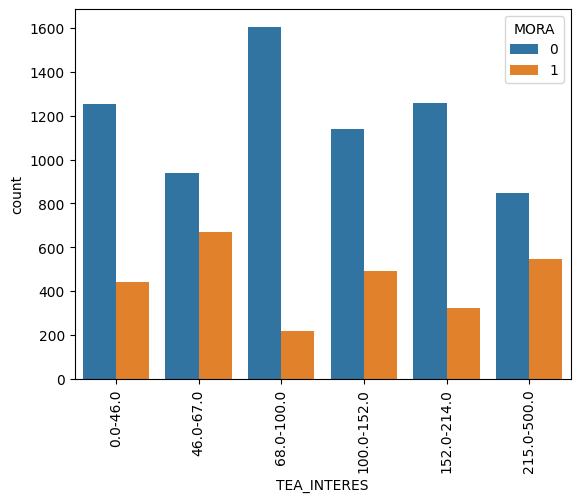

In [350]:
x = sns.countplot(data, x='TEA_INTERES', hue='MORA',order = ordenar(list(set(data['TEA_INTERES'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

##### Insights
- La mayoría de los valores de TEA_INTERES se concentran en el intervalo de 80.0-100.0, seguido de cerca por los intervalos 0.0-41.0 y 205.0-290.0, estos dos primeros tienen menor cantidad de socios que cayeron en default.
- Los prestamos con intervalos de 49-60, 60-80, 126-157, 290-500 de TEA_INTERES presentan una mayor cantidad de mora con respecto a creditos sin mora en el mismo intervalo.
- Como se muestra en grafico, ciertos rangos específicos de TEA_INTERES pueden estar asociados con un mayor riesgo de mora.

### CUOTA

In [351]:
data.CUOTA_FIJA.value_counts()

CUOTA_FIJA
0.0-21.0         758
38.0-49.0        751
102.0-138.0      749
797.0-13378.0    749
187.0-233.0      749
313.0-460.0      748
460.0-796.0      748
138.0-187.0      748
234.0-313.0      748
49.0-72.0        747
72.0-102.0       747
29.0-38.0        746
21.0-29.0        746
Name: count, dtype: int64

In [352]:
data['CUOTA_FIJA'].isna().sum()

0

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\3478352474.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


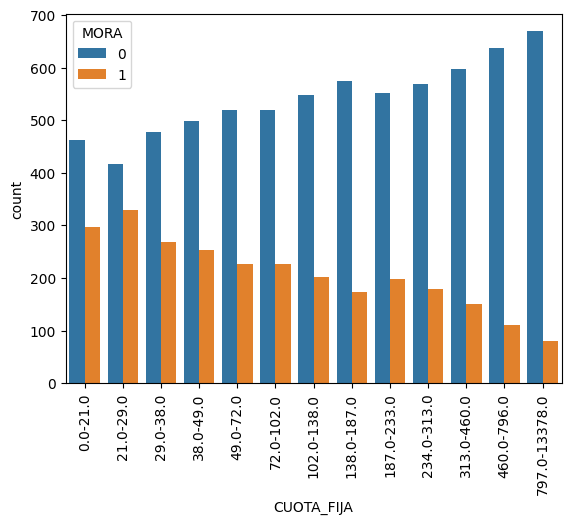

In [353]:
x = sns.countplot(data, x='CUOTA_FIJA', hue='MORA', order = ordenar(list(set(data['CUOTA_FIJA'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### INSIGHTS
- Se puede observar en el gráfico que a medida que el valor de la COUTA_FIJA aumenta, el porcentaje de morosidad disminuye en general.
- En los intervalos más bajos de CUOTA_FIJA (0.0-20.0 a 78.0-100.0), la proporción de MORA = 1 es relativamente alta en comparación con los intervalos más altos. Esto sugiere que las cuotas fijas más bajas podrían estar asociadas con un mayor riesgo de mora.

#### NCUO_ATRASADAS

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\1241296347.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


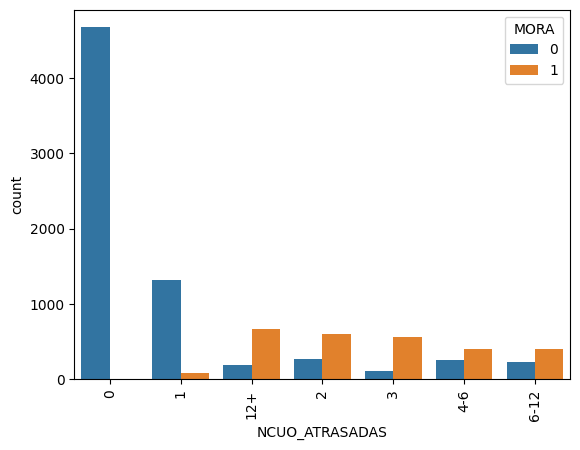

In [355]:
x = sns.countplot(data, x='NCUO_ATRASADAS', hue='MORA' ,order=sorted(data['NCUO_ATRASADAS'].unique()))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

### INSIGHTS
- Se puede observar la cantidad de cuotas atrasadas es minima en comparacion a prestamos que presentan cuotas atrasadas.
- Según el grafico tambien podemos percibir que conforme aumenta el numero de cuotas atrasadas, tambien lo hace la mora.

#### CUO_FALTANTES_VIGENTES

In [70]:
data.CUO_FALTANTES_VIGENTES.value_counts()

CUO_FALTANTES_VIGENTES
35-60     2001
1-6       1631
7-11      1494
19-34     1338
0         1305
12-18     1212
61-495     753
Name: count, dtype: int64

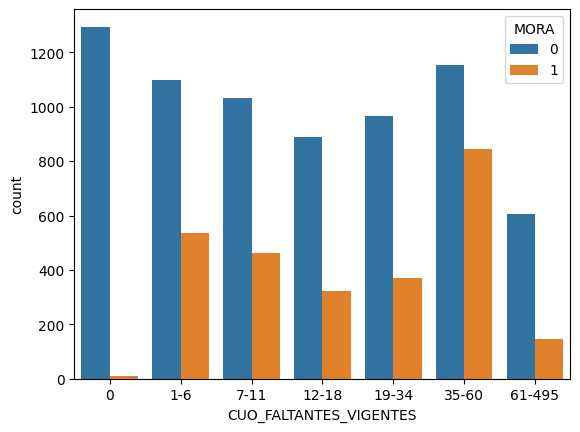

In [71]:
x = sns.countplot(data, x='CUO_FALTANTES_VIGENTES', hue='MORA',order=ordenar(list(set(data['CUO_FALTANTES_VIGENTES'].unique()))))


#### INSIGHTS
- Segun el grafico en el rango (1-34) se puede inferir que segun el numero de cuotas faltantes disminuye, el riesgo de mora aumenta.
- Podemos observas que en el rango de 35-60 cuotas faltantes, el riesgo de mora aumenta significativamente respecto a las demas categorias, esto puede indicar que dentro de esta categoria hay un alto porcentaje de prestamos que dejan de ser pagados o existe atrasos en sus pagos.

#### NDIAS_ATRASADOS

In [72]:
data.NDIAS_ATRASADOS.value_counts()

NDIAS_ATRASADOS
0        6281
90+      1180
1-15      754
45-60     688
15-45     658
60-90     173
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\618374493.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


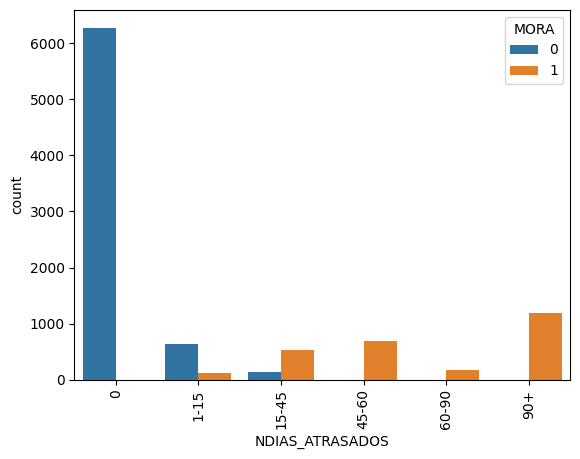

In [73]:
x = sns.countplot(data, x='NDIAS_ATRASADOS', hue='MORA',order=sorted(data['NDIAS_ATRASADOS'].unique()))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### INSIGHTS
- Del grafico podemos deducir que el NDIAS_ATRASADOS influye en la MORA directamente en la mora.

#### MONTO_PRESTAMO

In [74]:
data.MONTO_PRESTAMO.value_counts()

MONTO_PRESTAMO
4510.0-5500.0       869
200.0-1015.0        827
2000.0-2200.0       757
1510.0-2000.0       746
2300.0-3030.0       683
3035.0-3360.0       668
7001.0-10120.0      666
10125.0-20000.0     650
20001.0-450000.0    628
1135.0-1510.0       612
1110.0-1130.0       610
3370.0-4500.0       603
1020.0-1100.0       551
2210.0-2290.0       443
5510.0-7000.0       421
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\1050183195.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


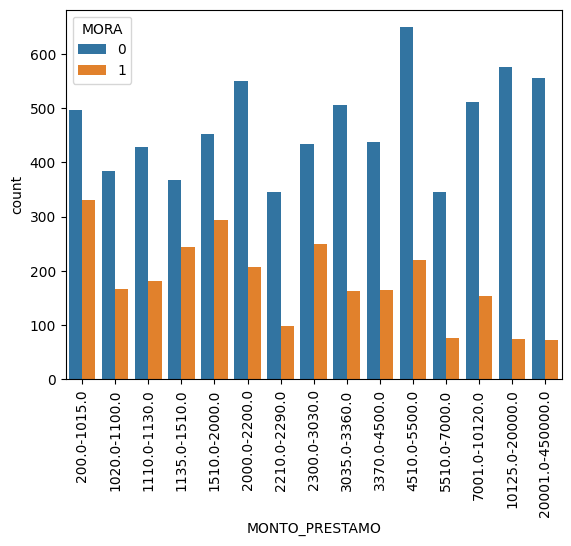

In [75]:
x = sns.countplot(data, x='MONTO_PRESTAMO', hue='MORA',order = ordenar(list(set(data['MONTO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### INSIGHTS
- Algunos intervalos específicos, como 1510.0-2000.0 y 2210.0-2290.0, muestran una proporción relativamente alta de mora, indicando que los préstamos en estos rangos tienen un mayor riesgo.
- En los intervalos más altos de MONTO_PRESTAMO (7001.0-10120.0 y 20001.0-45000.0), la proporción de observaciones con mora es relativamente baja. Esto sugiere que los préstamos de montos muy altos tienden a ser pagados con mayor regularidad.
- Los intervalos de 1135.0-1510.0 y 2000.0-2200.0 muestran una proporción relativamente alta de mora. Esto indica que los préstamos dentro de estos rangos pueden estar asociados con un mayor riesgo de mora. 

#### SALDO_PRESTAMO

In [76]:
data.SALDO_PRESTAMO.value_counts()

SALDO_PRESTAMO
1.0-534.0          1112
845.0-1160.0       1086
535.0-845.0        1082
7832.0-177657.0    1082
2460.0-3853.0      1082
1723.0-2460.0      1081
3855.0-7832.0      1081
1161.0-1721.0      1077
0                  1051
Name: count, dtype: int64

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_27792\84685381.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  x.set_xticklabels(x.get_xticklabels(), rotation=90);


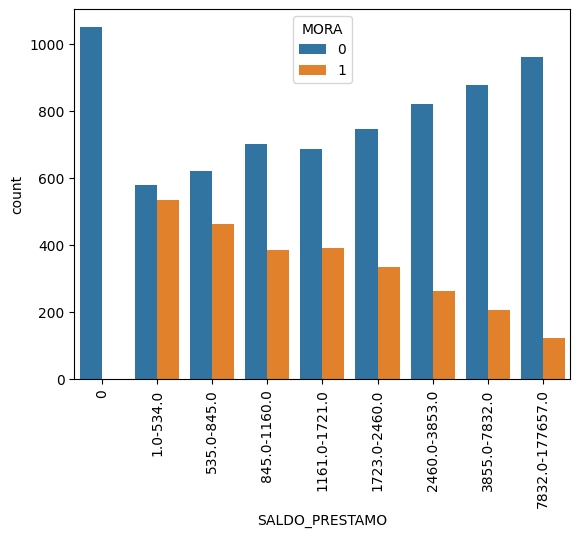

In [77]:
x = sns.countplot(data, x='SALDO_PRESTAMO', hue='MORA',order = ordenar(list(set(data['SALDO_PRESTAMO'].unique()))))
x.set_xticklabels(x.get_xticklabels(), rotation=90);

#### INSIGHTS
- La distribucion de saldo prestamo muestra que a medida que el saldo prestamo disminuye, el riesgo de mora aumenta, esto podría deberse a los prestamos de montos bajos que presentan un mayor indice de morosidad o bien a que algunos prestamos se atrasan en las ultimas cuotas
